In [120]:
#Importando as bibliotecas gerais:
import numpy as np
import seaborn as sns
from scipy.special import erfc
import matplotlib.pyplot as plt

# Importando as bibliotecas Scikit Learn:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [121]:
# Função de modulação dos simbolos:
def modulate(bits):
        # Definição dos simbolos
        symbols_qpsk = [-1.0 - 1j*1.0, -1.0 + 1j*1.0, 1.0 - 1j*1.0, 1.0 + 1j*1.0]
        ip = symbols_qpsk[bits]

        # Normalização da energia para um.
        symbol = (1.0/np.sqrt(2.0))*ip
        
        return symbol

In [127]:
# Qnt. de simbolos a ser transmitidos:
N = 10000

# Criação do vetor EsN0dB:
EsN0dB = 15
EsN0Lin = 10.0**(-(EsN0dB/10.0))

# Vetor para armazenar os simbolos
y = np.zeros((N, 1), dtype=complex)
for i in range(0, N):
      if(mod[i] == 1):
        # Geração dos simbolos QPSK
        bit_qpsk = np.random.randint(0, 4)

        # Modulação dos simbolos QPSK
        symbol = modulate(bit_qpsk)

        # Passagem pelo canal AWGN
        noise = np.sqrt(EsN0Lin/2.0)*(np.random.randn() + 1j*np.random.randn()) 
        
        # Simbolo final:
        y[i] = symbol + noise

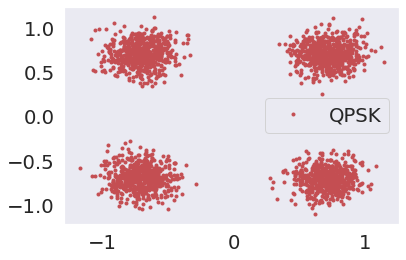

In [132]:
# Plotagem dos simbolos:
idx1 = np.argwhere(mod == 1)
plt.plot(np.real(y[idx1.ravel()]), np.imag(y[idx1.ravel()]), 'r.', label='QPSK')
plt.grid()
plt.legend()
plt.show()

In [139]:
# Concatenação dos vlaores reais e imaginários:
X = np.c_[np.real(y), np.imag(y)]

# Instânciando o classificador logístico:
classifier = LogisticRegression(fit_intercept=True)

# Treinamento do modelo:
classifier.fit(X, mod)

# Predição do modelo:
y_pred = classifier.predict(X)

In [140]:
# Calculando a acurácia das predições:
acc = accuracy_score(mod, y_pred)

# Imprimindo a acurária:
print("O modelo possui acurácia  = {}".format(acc))

O modelo possui acurácia  = 0.3811


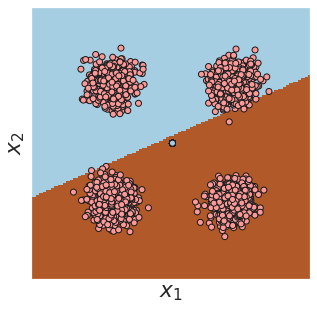

In [141]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(5, 5))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=mod, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()